<a href="https://colab.research.google.com/github/Selinalkan/GitPractice/blob/main/Word_clouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import csv

# **Interviewer with Context**

In [155]:
#Importing ER_c_Transcript Dataset and dropping the Unnamed column
df = pd.read_csv("ER_c_transcript.csv").drop("Unnamed: 0", axis=1)

In [156]:
#Checking the Data
df.head()

,speaker_trustworthy,speaker_trusts conversational partner,ER_text
0,4.333333,2.666667,"""Something you've said repeatedly is that you ..."
1,4.333333,2.333333,"""What's the data? Give us an example. What, wh..."
2,3.333333,3.666667,And what are those?'
3,3.666667,3.333333,"Alright, so let me get this right. You offered..."
4,3.666667,3.333333,"And that was a big thing, right? Was rejoining..."


In [172]:
#Sorting the data by "speaker_trustworthy" values
df_sorted1 = df.sort_values("speaker_trustworthy", ascending=False)
#Sorting the data by "speaker_trusted by conversational partner" values
df_sorted2 = df.sort_values("speaker_trusts conversational partner", ascending=False)

In [ ]:
df_sorted1.head(10)

In [177]:
#Joining the first 10 rows to create 1 word cloud per feature
df_sorted1_joined = " ".join(df_sorted1.ER_text[:10])
df_sorted2_joined = " ".join(df_sorted2.ER_text[:10])

In [178]:
df_sorted1_joined

'"Something you\'ve said repeatedly is that you would expect and you would accept a certain punishment for your actions. What if that package of punishment included working for the home team? What if someone said \'help us harden our elections from attack using your skills\'?" "Yeah. You write about the importance of guardrails so that you\'re not working all the time. But that\'s hard to do, especially if you\'re working on a very flexible schedule and you\'re taking time out during the day to be with your children or during the pandemic to help with their education on Zoom or, you know, just at home. So you have to compensate for that by working in the evenings, so it gets very blurry throughout the day.\\n" "Yeah, good news there. OK, so we can still have the parties; let\'s just make sure to have the tests ready to make sure everyone\'s vaccinated, boosted, ready to go. And, you know, some kids, especially those between ages 5 and 11, may only be partly vaccinated. Are they safe to

In [179]:
df_sorted2_joined

'If just raising the interest rate could be a good weapon for this, why not deploy it sooner?\' "And cut to today, where you have, as story said, I think it\'s more than 160 million guests arrivals, as you call it. 2 million people stayed in AirB&Bs on New Year\'s Eve alone, that night. And, and you\'re worth thirty billion dollars, or maybe it\'s 31 as of last week, I read. So, I just, I should have done this before, but does everyone know what AirB&B is? Raise your hand if you know what AirB&B is, because you still sometimes have to ask. Okay." So is it, is it that, so it, could you say that it\\\'s your brain getting work done that it can\\\'t do when you\\\'re conscious? Because it\\\'s you, you\\\'re using it for other things, and it goes "Right, he\\\'s asleep, let\\\'s do this stuff, let\\\'s stock-take, let\\\'s put..." That, that\\\'s, is it like putting a kid\\\'s toys away when he\\\'s asleep? Is, I can\\\'t grasp what you mean by... How do they consolidate memories? Where d

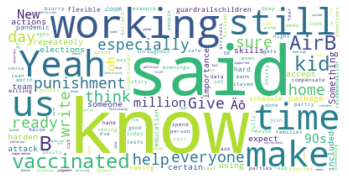

In [181]:
# Generating word cloud for speaker_trustworthy
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted1_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

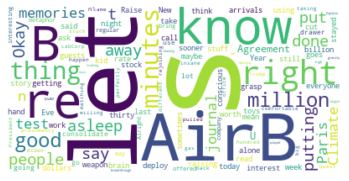

In [182]:
# Generating word cloud for speaker_trusts
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted2_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [160]:
df_sorted2.head(10)

,speaker_trustworthy,speaker_trusts conversational partner,ER_text
5,2.666667,4.666667,If just raising the interest rate could be a g...
28,4.000000,4.000000,"""And cut to today, where you have, as story sa..."
25,3.000000,4.000000,"So is it, is it that, so it, could you say tha..."
2,3.333333,3.666667,And what are those?'
15,3.666667,3.333333,"""Okay, that's interesting. I didn't know that...."
3,3.666667,3.333333,"Alright, so let me get this right. You offered..."
4,3.666667,3.333333,"And that was a big thing, right? Was rejoining..."
26,3.666667,3.333333,"""So we're stuck with gas, until some insane br..."
19,3.666667,3.000000,"""You're trading high minutes, because Russ is ..."
8,3.666667,3.000000,Explain it to me.'


**The codes below generates word clouds for the first 5 rows of both features, but there is an error.**
**Why I did what I did:**

I wanted to create the wordclouds only for those with a score higher than 2.5 for each of the features (speaker_trustworthy and speaker_trusted by conversational partner); however, the type of the values in those columns is numpy.float64, with which I cannot do comparison. I tried to convert them to Python int, but it did not work. 

In order to have a more sensible wordcloud data that we can at least visually evaluate, I decided to sort the data by the two features separately, and create wordcloud charts for the first 5 rows of both features.

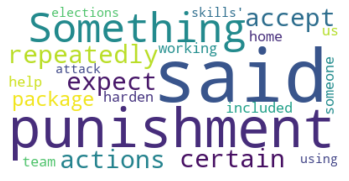

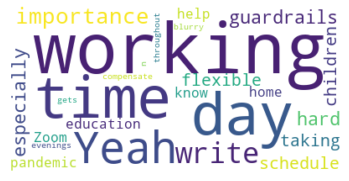

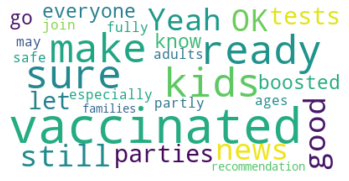

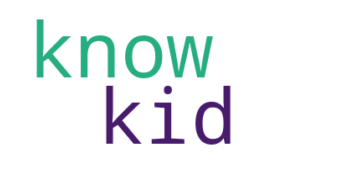

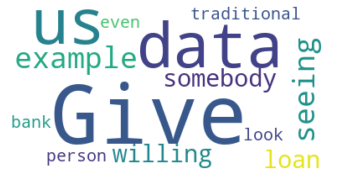

In [161]:
# Creates wordclouds for the first 5 rows based on speaker_trustworthy sorting
for row in df_sorted1.ER_text[:5]:
  word_cloud = WordCloud(collocations = False, background_color = 'white').generate(row)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**ERROR BELOW – Need Help**

The 4th row in df_sorted2 is "And what are those?"; however, we get an error with word cloud generation because all of these are stopwords that word cloud gets rid of. How to solve this?

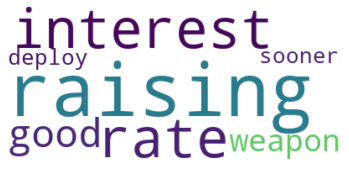

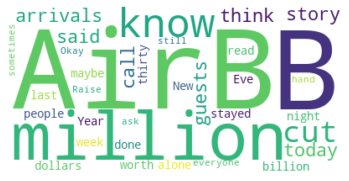

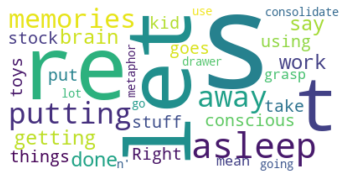

ValueError: ignored

In [168]:
# Creates wordclouds for the first 5 rows based on speaker_trusted by conversational partner sorting
for row in df_sorted2.ER_text[:10]:
  word_cloud = WordCloud(collocations = False, background_color = 'white').generate(row)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [119]:
# doesn't do the comparison, probably cause numpy float-int situation
for i in range(len(df)):
  if df.iloc[i, 1] < 2.5:
    tr_df = df.drop([i, 1], axis=0)


In [ ]:
# DO NOT RUN

# Example Code Below

#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#Importing Dataset
df = pd.read_csv("android-games.csv")
#Checking the Data
df.head()
#Checking for NaN values
df.isna().sum()
#Removing NaN Values
#df.dropna(inplace = True)
#Creating the text variable
text = " ".join(cat.split()[1] for cat in df.category)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Interviewer without Context**

In [183]:
#Importing ER_c_Transcript Dataset and dropping the Unnamed column
df = pd.read_csv("ER_nc_transcript.csv").drop("Unnamed: 0", axis=1)

In [185]:
#Checking the Data
df.head()

,speaker_trustworthy,speaker_trusts conversational partner,ER_text
0,3.000000,3.000000,"""Something you've said repeatedly is that you ..."
1,3.333333,4.333333,"""What's the data? Give us an example. What, wh..."
2,3.333333,2.000000,And what are those?'
3,2.666667,3.666667,"Alright, so let me get this right. You offered..."
4,3.000000,3.666667,"And that was a big thing, right? Was rejoining..."


In [186]:
#Sorting the data by "speaker_trustworthy" values
df_sorted1 = df.sort_values("speaker_trustworthy", ascending=False)
#Sorting the data by "speaker_trusts conversational partner" values
df_sorted2 = df.sort_values("speaker_trusts conversational partner", ascending=False)

In [187]:
#Joining the first 10 rows to create 1 word cloud per feature
df_sorted1_joined = " ".join(df_sorted1.ER_text[:10])
df_sorted2_joined = " ".join(df_sorted2.ER_text[:10])

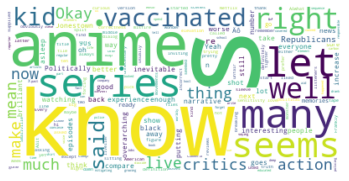

In [188]:
# Generating word cloud for speaker_trustworthy
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted1_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

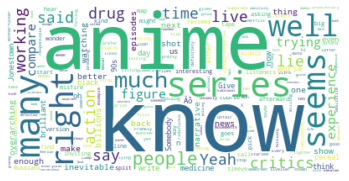

In [189]:
# Generating word cloud for speaker_trusts
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted2_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **INTERVIEWEE WITH CONTEXT**

In [190]:
#Importing ER_c_Transcript Dataset and dropping the Unnamed column
df = pd.read_csv("EE_c_transcript.csv").drop("Unnamed: 0", axis=1)

In [191]:
#Checking the Data
df.head()

,speaker_trustworthy,speaker_trusted by conversational partner,ER_text
0,4.000000,1.666667,"""The United States will always be my home, and..."
1,4.000000,2.000000,"""We've just questioned a bunch of the, of the ..."
2,3.000000,3.666667,"""We are quantifying it and it's having a real ..."
3,4.000000,2.333333,"""Absolutely not. We're incredibly blessed to h..."
4,2.333333,3.333333,"He did. And kind of the big, overall one was a..."


In [192]:
#Sorting the data by "speaker_trustworthy" values
df_sorted1 = df.sort_values("speaker_trustworthy", ascending=False)
#Sorting the data by "speaker_trusts conversational partner" values
df_sorted2 = df.sort_values("speaker_trusted by conversational partner", ascending=False)

In [193]:
#Joining the first 10 rows to create 1 word cloud per feature
df_sorted1_joined = " ".join(df_sorted1.ER_text[:10])
df_sorted2_joined = " ".join(df_sorted2.ER_text[:10])

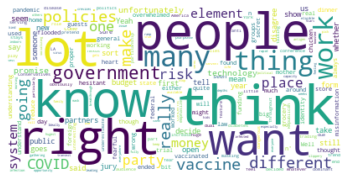

In [194]:
# Generating word cloud for speaker_trustworthy
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted1_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

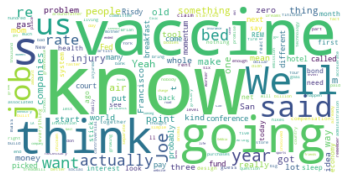

In [195]:
# Generating word cloud for speaker_trusted
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted2_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **INTERVIEWEE WITHOUT CONTEXT**

In [196]:
#Importing ER_c_Transcript Dataset and dropping the Unnamed column
df = pd.read_csv("EE_nc_transcript.csv").drop("Unnamed: 0", axis=1)

In [197]:
#Checking the Data
df.head()

,speaker_trustworthy,speaker_trusted by conversational partner,ER_text
0,3.333333,3.333333,"""The United States will always be my home, and..."
1,4.000000,3.666667,"""We've just questioned a bunch of the, of the ..."
2,2.000000,2.000000,"""We are quantifying it and it's having a real ..."
3,3.000000,2.666667,"""Absolutely not. We're incredibly blessed to h..."
4,3.333333,2.333333,"He did. And kind of the big, overall one was a..."


In [198]:
#Sorting the data by "speaker_trustworthy" values
df_sorted1 = df.sort_values("speaker_trustworthy", ascending=False)
#Sorting the data by "speaker_trusts conversational partner" values
df_sorted2 = df.sort_values("speaker_trusted by conversational partner", ascending=False)

In [199]:
#Joining the first 10 rows to create 1 word cloud per feature
df_sorted1_joined = " ".join(df_sorted1.ER_text[:10])
df_sorted2_joined = " ".join(df_sorted2.ER_text[:10])

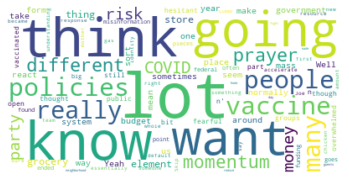

In [200]:
# Generating word cloud for speaker_trustworthy
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted1_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

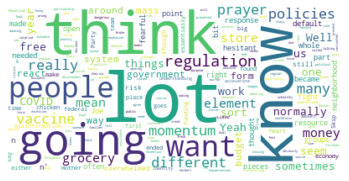

In [201]:
# Generating word cloud for speaker_trusted
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted2_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()